<h1>Import Libraries</h1>

In [1]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding

<h1>Read csv</h1>

In [2]:
df = pd.read_csv('tweets.csv')
df

,Tweet text,Label,Votes for the majority label
0,Beats by Dr. Dre urBeats Wired In-Ear Headphon...,spam,4
1,RT @Papapishu: Man it would fucking rule if we...,abusive,4
2,It is time to draw close to Him &#128591;&#127...,normal,4
3,if you notice me start to act different or dis...,normal,5
4,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
...,...,...,...
99991,RT @shangros: my fucking queen https://t.co/wa...,abusive,5
99992,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
99993,@LGUSAMobile why does my phone screen keeps fl...,normal,3
99994,#bigdata vs. #reality ... but equally applies ...,normal,5


<h1>Drop spam labeled tweets and reset index</h1>

In [3]:
df = df[df['Label'] != "spam"].dropna()
df = df.reset_index(drop=True)
df

,Tweet text,Label,Votes for the majority label
0,RT @Papapishu: Man it would fucking rule if we...,abusive,4
1,It is time to draw close to Him &#128591;&#127...,normal,4
2,if you notice me start to act different or dis...,normal,5
3,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
4,RT @Vitiligoprince: Hate Being sexually Frustr...,abusive,4
...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,abusive,5
85962,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
85963,@LGUSAMobile why does my phone screen keeps fl...,normal,3
85964,#bigdata vs. #reality ... but equally applies ...,normal,5


<h1>Combining abusive and hateful tweets to one labeled, named harmful</h1>

In [4]:
df['Label'] = df['Label'].replace(['abusive', 'hateful'], 'harmful')
df

,Tweet text,Label,Votes for the majority label
0,RT @Papapishu: Man it would fucking rule if we...,harmful,4
1,It is time to draw close to Him &#128591;&#127...,normal,4
2,if you notice me start to act different or dis...,normal,5
3,"Forget unfollowers, I believe in growing. 7 ne...",normal,3
4,RT @Vitiligoprince: Hate Being sexually Frustr...,harmful,4
...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,harmful,5
85962,#Osteporosis treated with #PEMF - rebuild bone...,normal,3
85963,@LGUSAMobile why does my phone screen keeps fl...,normal,3
85964,#bigdata vs. #reality ... but equally applies ...,normal,5


<h1>Map harmful to 0 and normal to 1</h1>

In [5]:
df['Label'] = df['Label'].replace(["harmful", "normal"], [0, 1])
df

,Tweet text,Label,Votes for the majority label
0,RT @Papapishu: Man it would fucking rule if we...,0,4
1,It is time to draw close to Him &#128591;&#127...,1,4
2,if you notice me start to act different or dis...,1,5
3,"Forget unfollowers, I believe in growing. 7 ne...",1,3
4,RT @Vitiligoprince: Hate Being sexually Frustr...,0,4
...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,0,5
85962,#Osteporosis treated with #PEMF - rebuild bone...,1,3
85963,@LGUSAMobile why does my phone screen keeps fl...,1,3
85964,#bigdata vs. #reality ... but equally applies ...,1,5


<h1>Preprocessing phase</h1>

<h2>Removing Twitter Handles (@user)</h2>

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

# remove twitter handles (@user)
df['Clean Tweet text'] = np.vectorize(remove_pattern)(df['Tweet text'], "@[\w]*")

df

,Tweet text,Label,Votes for the majority label,Clean Tweet text
0,RT @Papapishu: Man it would fucking rule if we...,0,4,RT : Man it would fucking rule if we had a par...
1,It is time to draw close to Him &#128591;&#127...,1,4,It is time to draw close to Him &#128591;&#127...
2,if you notice me start to act different or dis...,1,5,if you notice me start to act different or dis...
3,"Forget unfollowers, I believe in growing. 7 ne...",1,3,"Forget unfollowers, I believe in growing. 7 ne..."
4,RT @Vitiligoprince: Hate Being sexually Frustr...,0,4,RT : Hate Being sexually Frustrated Like I wan...
...,...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,0,5,RT : my fucking queen https://t.co/waxzzoEWrA
85962,#Osteporosis treated with #PEMF - rebuild bone...,1,3,#Osteporosis treated with #PEMF - rebuild bone...
85963,@LGUSAMobile why does my phone screen keeps fl...,1,3,why does my phone screen keeps flickring i'm ...
85964,#bigdata vs. #reality ... but equally applies ...,1,5,#bigdata vs. #reality ... but equally applies ...


<h2>Remove links</h2>

In [7]:
df['Clean Tweet text'] = df['Clean Tweet text'].str.replace("https?:\/\/.*[\r\n]*", " ")
df

C:\Users\kostasm\AppData\Local\Temp\ipykernel_25068\2283934705.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean Tweet text'] = df['Clean Tweet text'].str.replace("https?:\/\/.*[\r\n]*", " ")


,Tweet text,Label,Votes for the majority label,Clean Tweet text
0,RT @Papapishu: Man it would fucking rule if we...,0,4,RT : Man it would fucking rule if we had a par...
1,It is time to draw close to Him &#128591;&#127...,1,4,It is time to draw close to Him &#128591;&#127...
2,if you notice me start to act different or dis...,1,5,if you notice me start to act different or dis...
3,"Forget unfollowers, I believe in growing. 7 ne...",1,3,"Forget unfollowers, I believe in growing. 7 ne..."
4,RT @Vitiligoprince: Hate Being sexually Frustr...,0,4,RT : Hate Being sexually Frustrated Like I wan...
...,...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,0,5,RT : my fucking queen
85962,#Osteporosis treated with #PEMF - rebuild bone...,1,3,#Osteporosis treated with #PEMF - rebuild bone...
85963,@LGUSAMobile why does my phone screen keeps fl...,1,3,why does my phone screen keeps flickring i'm ...
85964,#bigdata vs. #reality ... but equally applies ...,1,5,#bigdata vs. #reality ... but equally applies ...


<h2>Removing Punctuations, Numbers, and Special Characters</h2>

In [8]:
# remove special characters, numbers, punctuations
df['Clean Tweet text'] = df['Clean Tweet text'].str.replace("[^a-zA-Z#]", " ")
df

C:\Users\kostasm\AppData\Local\Temp\ipykernel_25068\1220127832.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Clean Tweet text'] = df['Clean Tweet text'].str.replace("[^a-zA-Z#]", " ")


,Tweet text,Label,Votes for the majority label,Clean Tweet text
0,RT @Papapishu: Man it would fucking rule if we...,0,4,RT Man it would fucking rule if we had a par...
1,It is time to draw close to Him &#128591;&#127...,1,4,It is time to draw close to Him # # ...
2,if you notice me start to act different or dis...,1,5,if you notice me start to act different or dis...
3,"Forget unfollowers, I believe in growing. 7 ne...",1,3,Forget unfollowers I believe in growing ne...
4,RT @Vitiligoprince: Hate Being sexually Frustr...,0,4,RT Hate Being sexually Frustrated Like I wan...
...,...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,0,5,RT my fucking queen
85962,#Osteporosis treated with #PEMF - rebuild bone...,1,3,#Osteporosis treated with #PEMF rebuild bone...
85963,@LGUSAMobile why does my phone screen keeps fl...,1,3,why does my phone screen keeps flickring i m ...
85964,#bigdata vs. #reality ... but equally applies ...,1,5,#bigdata vs #reality but equally applies ...


<h2>Removing Short Words</h2>

In [9]:
df['Clean Tweet text'] = df['Clean Tweet text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df

,Tweet text,Label,Votes for the majority label,Clean Tweet text
0,RT @Papapishu: Man it would fucking rule if we...,0,4,would fucking rule party that against perpetua...
1,It is time to draw close to Him &#128591;&#127...,1,4,time draw close Father draw near always
2,if you notice me start to act different or dis...,1,5,notice start different distant peeped somethin...
3,"Forget unfollowers, I believe in growing. 7 ne...",1,3,Forget unfollowers believe growing followers l...
4,RT @Vitiligoprince: Hate Being sexually Frustr...,0,4,Hate Being sexually Frustrated Like wanna Fuck...
...,...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,0,5,fucking queen
85962,#Osteporosis treated with #PEMF - rebuild bone...,1,3,#Osteporosis treated with #PEMF rebuild bone mass
85963,@LGUSAMobile why does my phone screen keeps fl...,1,3,does phone screen keeps flickring that phone y...
85964,#bigdata vs. #reality ... but equally applies ...,1,5,#bigdata #reality equally applies #ecommerce p...


<h2>Tokenization</h2>

In [10]:
tokenized_tweets = df['Clean Tweet text'].apply(lambda x: x.split())
tokenized_tweets

0        [would, fucking, rule, party, that, against, p...
1          [time, draw, close, Father, draw, near, always]
2        [notice, start, different, distant, peeped, so...
3        [Forget, unfollowers, believe, growing, follow...
4        [Hate, Being, sexually, Frustrated, Like, wann...
                               ...                        
85961                                     [fucking, queen]
85962    [#Osteporosis, treated, with, #PEMF, rebuild, ...
85963    [does, phone, screen, keeps, flickring, that, ...
85964    [#bigdata, #reality, equally, applies, #ecomme...
85965    [whatever, choose, first, know, willing, work,...
Name: Clean Tweet text, Length: 85966, dtype: object

<h2>Stemming</h2>

In [11]:
from nltk.stem.porter import *

stemmer = PorterStemmer()

tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweets

0        [would, fuck, rule, parti, that, against, perp...
1           [time, draw, close, father, draw, near, alway]
2        [notic, start, differ, distant, peep, someth, ...
3        [forget, unfollow, believ, grow, follow, last,...
4        [hate, be, sexual, frustrat, like, wanna, fuck...
                               ...                        
85961                                        [fuck, queen]
85962    [#osteporosi, treat, with, #pemf, rebuild, bon...
85963    [doe, phone, screen, keep, flickr, that, phone...
85964    [#bigdata, #realiti, equal, appli, #ecommerc, ...
85965    [whatev, choos, first, know, will, work, with,...
Name: Clean Tweet text, Length: 85966, dtype: object

<h2>Combine stemmed tweets to dataset</h2>

In [12]:
for i in range(len(tokenized_tweets)):
    temp = ' '.join(tokenized_tweets[i])
    tokenized_tweets[i] = temp

df['Clean Tweet text'] = tokenized_tweets
df

,Tweet text,Label,Votes for the majority label,Clean Tweet text
0,RT @Papapishu: Man it would fucking rule if we...,0,4,would fuck rule parti that against perpetu warfar
1,It is time to draw close to Him &#128591;&#127...,1,4,time draw close father draw near alway
2,if you notice me start to act different or dis...,1,5,notic start differ distant peep someth notic d...
3,"Forget unfollowers, I believe in growing. 7 ne...",1,3,forget unfollow believ grow follow last stat
4,RT @Vitiligoprince: Hate Being sexually Frustr...,0,4,hate be sexual frustrat like wanna fuck wanna ...
...,...,...,...,...
85961,RT @shangros: my fucking queen https://t.co/wa...,0,5,fuck queen
85962,#Osteporosis treated with #PEMF - rebuild bone...,1,3,#osteporosi treat with #pemf rebuild bone mass
85963,@LGUSAMobile why does my phone screen keeps fl...,1,3,doe phone screen keep flickr that phone year b...
85964,#bigdata vs. #reality ... but equally applies ...,1,5,#bigdata #realiti equal appli #ecommerc project


<h1>Declare the preprocessing function</h1>
<p>This function takes a string and applies several regular expressions on the string, in order to eliminate unecessary words.</p>

In [13]:
def preprocessing(text):
    # Different regex parts for smiley faces
    eyes = "[8:=;]"
    nose = "['`\-]?"

    text = re.sub(r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", "<URL>", text)
    text = re.sub(r"/"," / ", text)
    text = re.sub(r"@\w+", "<USER>", text)
    text = re.sub(rf"{eyes}{nose}\)+|\(+{nose}{eyes}", "<SMILE>", text)
    text = re.sub(rf"{eyes}{nose}p+", "<LOLFACE>", text)
    text = re.sub(rf"{eyes}{nose}\(+|\)+{nose}{eyes}", "<SADFACE>", text)
    text = re.sub(rf"{eyes}{nose}[/|l]+", "<NEUTRALFACE>", text)
    text = re.sub(r"<3", "<HEART>", text)
    text = re.sub(r"[\-\+]?[.\d]*[\d]+[:,.\d]*", "<NUMBER>", text)
    text = re.sub(r"#", "<HASHTAG>", text)
    text = re.sub(r"([!?.]){2,}", r"\1 <REPEAT>", text)
    text = re.sub(r"\b(\S*?)(.)\2{2,}\b", r"\1\2 <ELONG>", text)
    text = re.sub(r"([^a-z0-9()<>'`\-]){2,}", r"\g<0> <ALLCAPS>",text)
    
    return text

<h1>Retrieve tweets text and apply the preprocessing function</h1>

In [14]:
text = df['Clean Tweet text'].tolist()
for i, j in zip(text, range(len(text))):
    text[j] = preprocessing(i)

<h1>Convert text to vector with CountVectorizer</h1>

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english')
# bag-of-words feature matrix
vectors = vectorizer.fit_transform(text)

<h1>Print info on vectorised text</h1>

In [16]:
# summarize encoded vector
print(vectors.shape)
print(type(vectors))

(85966, 2000)
<class 'scipy.sparse.csr.csr_matrix'>


<h1>Check for PCA</h1>

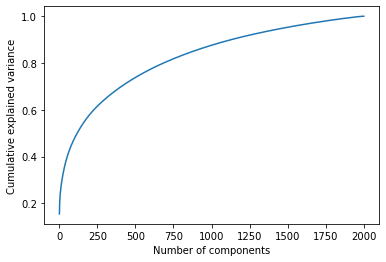

In [17]:
from sklearn.decomposition import PCA

# Load your data into a numpy array
temp = np.asarray([np.reshape(i.A, 2000) for i in vectors])

# Initialize a PCA object with the number of components you want to test
pca = PCA(n_components=temp.shape[1])

# Fit the PCA object to your data
pca.fit(temp)

# Plot the explained variance of each component
import matplotlib.pyplot as plt
plt.plot(range(1, temp.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

<h1>Create PCA model and transform the data</h1>
<p> The PCA model is created using 50 components to keep at least a 70% similarity to the original data, and be able to reduce the time that each algorithm would require to finish.</p>

In [18]:
x = np.asarray([np.reshape(i.A, 2000) for i in vectors])

pca = PCA(2) 

x = pca.fit_transform(x)
x.shape

(85966, 2)

<h1>Retrieve labels</h1>

In [19]:
y = df['Label'].tolist()

<h1>Create Clustering Models</h1>

<h2>KMeans</h2>

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans_labels = kmeans.labels_

<h2>Agglomerative Clustering</h2>

In [22]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering().fit(x)
ac_labels = clustering.labels_

MemoryError: Unable to allocate 27.5 GiB for an array with shape (3695033595,) and data type float64

<h2>OPTICS</h2>

In [24]:
from sklearn.cluster import OPTICS

clustering = OPTICS(min_samples=10000).fit(x)
optics_labels = clustering.labels_

<h2>Birch</h2>

In [25]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=2).fit(x)
birch_labels = brc.labels_

<h2>DBScan</h2>

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=20).fit(x)
dbscan_labels = dbscan.labels_

<h1>Retrieving metrics for each algorithm</h1>

<h2>2.3.10.1. Rand index</h2>

In [ ]:
from sklearn import metrics

rand_score_kmeans = metrics.adjusted_rand_score(y, kmeans_labels)
rand_score_ac = metrics.adjusted_rand_score(y, ac_labels)
rand_score_optics = metrics.adjusted_rand_score(y, optics_labels)
rand_score_birch = metrics.adjusted_rand_score(y, birch_labels)
rand_score_dbscan = metrics.adjusted_rand_score(y, dbscan_labels)

<h2>2.3.10.2. Mutual Information based scores</h2>

In [ ]:
info_score_kmeans = metrics.adjusted_mutual_info_score(y, kmeans_labels)
info_score_ac = metrics.adjusted_mutual_info_score(y, ac_labels)
info_score_optics = metrics.adjusted_mutual_info_score(y, optics_labels)
info_score_birch = metrics.adjusted_mutual_info_score(y, birch_labels)
info_score_dbscan = metrics.adjusted_mutual_info_score(y, dbscan_labels)

<h2>2.3.10.3. Homogeneity, completeness and V-measure</h2>

In [ ]:
homogeneity_kmeans = metrics.homogeneity_score(y, kmeans_labels)
homogeneity_ac     = metrics.homogeneity_score(y, ac_labels)
homogeneity_optics = metrics.homogeneity_score(y, optics_labels)
homogeneity_birch  = metrics.homogeneity_score(y, birch_labels)
homogeneity_dbscan = metrics.homogeneity_score(y, dbscan_labels)

In [ ]:
completeness_kmeans = metrics.completeness_score(y, kmeans_labels)
completeness_ac     = metrics.completeness_score(y, ac_labels)
completeness_optics = metrics.completeness_score(y, optics_labels)
completeness_birch  = metrics.completeness_score(y, birch_labels)
completeness_dbscan = metrics.completeness_score(y, dbscan_labels)

In [ ]:
v_measure_kmeans = metrics.v_measure_score(y, kmeans_labels)
v_measure_ac     = metrics.v_measure_score(y, ac_labels)
v_measure_optics = metrics.v_measure_score(y, optics_labels)
v_measure_birch  = metrics.v_measure_score(y, birch_labels)
v_measure_dbscan = metrics.v_measure_score(y, dbscan_labels)

<h2>2.3.10.4. Fowlkes-Mallows scores</h2>

In [ ]:
fm_kmeans = metrics.fowlkes_mallows_score(y, kmeans_labels)
fm_ac     = metrics.fowlkes_mallows_score(y, ac_labels)
fm_optics = metrics.fowlkes_mallows_score(y, optics_labels)
fm_birch  = metrics.fowlkes_mallows_score(y, birch_labels)
fm_dbscan = metrics.fowlkes_mallows_score(y, dbscan_labels)

<h2>2.3.10.5. Silhouette Coefficient</h2>

In [ ]:
silhouette_kmeans = metrics.silhouette_score(x, kmeans_labels, metric='euclidean')
silhouette_ac     = metrics.silhouette_score(x, ac_labels, metric='euclidean')
silhouette_optics = metrics.silhouette_score(x, optics_labels, metric='euclidean')
silhouette_birch  = metrics.silhouette_score(x, birch_labels, metric='euclidean')
silhouette_dbscan = metrics.silhouette_score(x, dbscan_labels, metric='euclidean')

<h2>2.3.10.6. Calinski-Harabasz Index</h2>

In [ ]:
ch_kmeans = metrics.calinski_harabasz_score(x, kmeans_labels)
ch_ac     = metrics.calinski_harabasz_score(x, ac_labels)
ch_optics = metrics.calinski_harabasz_score(x, optics_labels)
ch_birch  = metrics.calinski_harabasz_score(x, birch_labels)
ch_dbscan = metrics.calinski_harabasz_score(x, dbscan_labels)

<h2>2.3.10.7. Davies-Bouldin Index</h2>

In [ ]:
db_kmeans = metrics.davies_bouldin_score(x, kmeans_labels)
db_ac     = metrics.davies_bouldin_score(x, ac_labels)
db_optics = metrics.davies_bouldin_score(x, optics_labels)
db_birch  = metrics.davies_bouldin_score(x, birch_labels)
db_dbscan = metrics.davies_bouldin_score(x, dbscan_labels)

<h2>2.3.10.8. Contingency Matrix</h2>

<h3>KMeans</h3>

In [ ]:
import seaborn as sns

cm = metrics.cluster.pair_confusion_matrix(y, kmeans_labels)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>Agglomerative Clustering</h3>

In [ ]:
cm = metrics.cluster.pair_confusion_matrix(y, ac_labels)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>OPTICS</h3>

In [ ]:
cm = metrics.cluster.pair_confusion_matrix(y, optics_labels)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>Birch</h3>

In [ ]:
cm = metrics.cluster.pair_confusion_matrix(y, birch_labels)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h3>DBScan</h3>

In [ ]:
cm = metrics.cluster.pair_confusion_matrix(y, dbscan_labels)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h1>Combine the results into one dataframe</h1>

In [ ]:
columns = ['KMeans', 'AglomerativeClustering', 'OPTICS', 'Birch', 'DBScan']
rows = ['Rand index',
        'Mutual Information based scores',
        'Homogeneity',
        'Completeness',
        'V-measure',
        'Fowlkes-Mallows scores',
        'Silhouette Coefficient',
        'Calinski-Harabasz Index',
        'Davies-Bouldin Index']
results = pd.DataFrame([[  rand_score_kmeans,   rand_score_ac,   rand_score_optics,   rand_score_birch,   rand_score_dbscan], 
                        [  info_score_kmeans,   info_score_ac,   info_score_optics,   info_score_birch,   info_score_dbscan], 
                        [ homogeneity_kmeans,  homogeneity_ac,  homogeneity_optics,  homogeneity_birch,  homogeneity_dbscan],
                        [completeness_kmeans, completeness_ac, completeness_optics, completeness_birch, completeness_dbscan],
                        [   v_measure_kmeans,    v_measure_ac,    v_measure_optics,    v_measure_birch,    v_measure_dbscan],
                        [          fm_kmeans,           fm_ac,           fm_optics,           fm_birch,           fm_dbscan],
                        [  silhouette_kmeans,   silhouette_ac,   silhouette_optics,   silhouette_birch,   silhouette_dbscan],
                        [          ch_kmeans,           ch_ac,           ch_optics,           ch_birch,           ch_dbscan],
                        [          db_kmeans,           db_ac,          db_optics,            db_birch,          db_dbscan]], 
                       rows, columns)
# transpose the DataFrame
results = results.transpose()
results

<h1>Plotting bar plot for each result</h1>

<h2>Rand index</h2>

In [ ]:
ax = results['Rand index'].plot.bar()

<h2>Mutual Information based scores</h2>

In [ ]:
ax = results['Mutual Information based scores'].plot.bar()

<h2>Homogeneity</h2>

In [ ]:
ax = results['Homogeneity'].plot.bar()

<h2>Completeness</h2>

In [ ]:
ax = results['Completeness'].plot.bar()

<h2>V-measure</h2>

In [ ]:
ax = results['V-measure'].plot.bar()

<h2>Fowlkes-Mallows scores</h2>

In [ ]:
ax = results['Fowlkes-Mallows scores'].plot.bar()

<h2>Silhouette Coefficient</h2>

In [ ]:
ax = results['Silhouette Coefficient'].plot.bar()

<h2>Calinski-Harabasz Index</h2>

In [ ]:
ax = results['Calinski-Harabasz Index'].plot.bar()

<h2>Davies-Bouldin Index</h2>

In [ ]:
ax = results['Davies-Bouldin Index'].plot.bar()